<h1>Python pipeline for a basic time series analysis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generating-a-test-time-series" data-toc-modified-id="Generating-a-test-time-series-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generating a test time series</a></span></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Signal-filtering" data-toc-modified-id="Signal-filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Signal filtering</a></span></li><li><span><a href="#Exercise-2:-Construct-a-filter-function" data-toc-modified-id="Exercise-2:-Construct-a-filter-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2: Construct a filter function</a></span></li><li><span><a href="#Exercise-3:-Reading-real-world-data" data-toc-modified-id="Exercise-3:-Reading-real-world-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 3: Reading real world data</a></span><ul class="toc-item"><li><span><a href="#Example-for-exporting-a-Pandas-DataFrame-into-an-Excel-file:" data-toc-modified-id="Example-for-exporting-a-Pandas-DataFrame-into-an-Excel-file:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Example for exporting a <em>Pandas</em> DataFrame into an <em>Excel</em> file:</a></span></li></ul></li><li><span><a href="#Grand-average" data-toc-modified-id="Grand-average-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grand average</a></span></li><li><span><a href="#Exercise-4:-Apply-your-filter-function-to-real-world-data-(Exercise-3-continued)" data-toc-modified-id="Exercise-4:-Apply-your-filter-function-to-real-world-data-(Exercise-3-continued)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 4: Apply your filter function to real world data (Exercise 3 continued)</a></span></li><li><span><a href="#Exercise-5:-Batch-file-processing" data-toc-modified-id="Exercise-5:-Batch-file-processing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 5: Batch file processing</a></span></li></ul></div>

In this chapter, we learn some basic time series analysis techniques and how to read real world data from a single file and from a batch of files.

## Generating a test time series

Before we start to analyse time series, we first have a look on how they are generated. We now construct a very simple time series  from scratch with _Python_.

Create a script including the following commands:

In [1]:
# Create some dummy data:
import numpy as np
import matplotlib.pyplot as plt 
       # imports most relevant Matplotlib commands

# create x-values:
dx = 0.1
x_values = np.arange(0, 2*np.pi, dx)

# define parameters:
f1 = 2  # Frequency 1 in Hz
f2 = 10 # Frequency 2 in Hz
A1 = 6 # Amplitude 1
A2 = 2 # Amplitude 2

A_sin = A1 * np.sin(f1 * x_values)
A_cos = A2 * np.cos(f2 * x_values)
A_signal = A_sin + A_cos

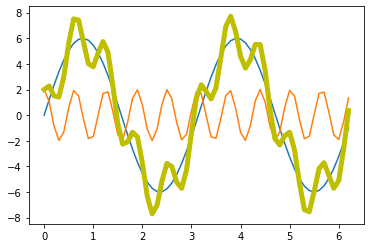

In [2]:
# plots:
fig=plt.figure(1)
plt.plot(x_values, A_sin)
plt.plot(x_values, A_cos)
plt.plot(x_values, A_signal, lw=5, c="y")
plt.show()

Now, we add some noise to the signal:

In [3]:
# add some noise:
np.random.seed(1)
A_Noise = 2
Noise = np.random.randn(len(x_values)) * A_Noise
A_signal_noisy = A_signal + Noise

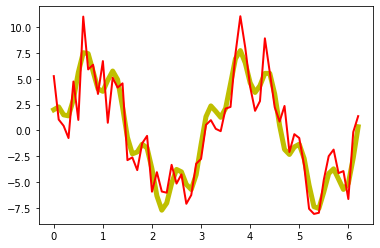

In [4]:
fig=plt.figure(1)
plt.plot(x_values, A_signal, lw=5, c="y")
plt.plot(x_values, A_signal_noisy, lw=2, c="r")
plt.show()

## Exercise 1
Basing the solution of Exercise 2 from the [_Data Visualization with Matplotlib_](https://www.fabriziomusacchio.com//teaching/python_course/11_matplotlib#exercise-2) chapter in the _Python Basics_ course, copy and modify the appropriate plot commands, in order to plot

1. `A_signal` (add the following properties to the plot command: `label="Signal", lw=2, c="pink"`)
2. `A_signal_noisy` (add the following properties to the plot command: `label="Noisy signal", lw=3, c="lime"`)
    
in a single plot window. Don't forget to annotate your plot with appropriate _x_- and _y_-labels, a title, and a legend. Also, save your plot as a PDF.

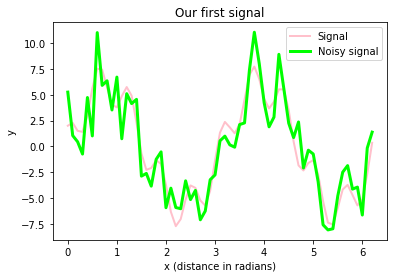

In [5]:
# Your solution 1 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 1:

# Plotting:
fig = plt.figure(1)
fig.clf()

# the main plot commands:
plt.plot(x_values, A_signal,
         label="Signal", lw=2, c="pink") 
plt.plot(x_values, A_signal_noisy, 
         label="Noisy signal", lw=3, c="lime") 

# axis labels and title:
plt.xlabel("x (distance in radians)")
plt.ylabel("y")
plt.title("Our first signal")

# shows a legend:
plt.legend(loc="best")

plt.show()          # finalizes the plot
fig.savefig("my_plot2.pdf", dpi=120)
~~~
</details>

The figure above includes
- our signal, which is a super-position of actually two prime signals (a sine and a cosine wave with different frequencies and amplitudes)
- our signal with some random ("background") noise.

## Signal filtering
We will now try to filter our signal in order to
1. recover the first and the second prime signal, respectively.
2. apply the same filtering operations to the noisy signal.

Let's first aplly a so-called [butter-worth filter](https://en.wikipedia.org/wiki/Butterworth_filter) to recover the (lower frequency) sine signal (i.e., we perform low-pass filtering). For this, we use the [`butter` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) from the `scipy-filter` package:

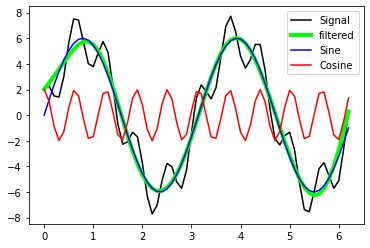

In [6]:
from scipy import signal # put this on top of
                         # your script

# set filter parameters:
fs = x_values.shape[0]  # Sampling frequency
fc = 5  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
filter_order = 10
# apply the filter function:
b, a = signal.butter(filter_order, w, 'low')

# filtering our signal
A_signal_clean = signal.filtfilt(b, a, A_signal)

plt.plot(x_values, A_signal, label='Signal', c="k")
plt.plot(x_values, A_signal_clean, label='filtered',
         c = "lime", lw=4)
plt.plot(x_values, A_sin, label='Sine', c="blue")
plt.plot(x_values, A_cos, label='Cosine', c="red")
plt.legend(loc="best")

With the defined filter settings we are able to recover the sine-signal from `A_signal`. 


In order to create a corresponding high-pass filter to also recover the high-frequency cosine signal, we would have to repeat all filter relevant commands from above. That's actually not the way how we should do. Instead, it would be convenient if we would have our own filter-function, so that we don't have to repeat all these complex steps.

## Exercise 2: Construct a filter function
1. Recap the [_Function definition_](https://www.fabriziomusacchio.com/teaching/python_course/09_functions) chapter from our _Python Basics_ course. 
2. Write a function that performs the low-pass filtering from above. Define the function in this way that the following arguments must be passed as input parameters: 
    - `sampling_freq` for the sampling frequency,
    - `cutoff_freq` for the cut-off frequency of the filter,
    - `filter_order` for the filter order, and
    - `input_signal` for the input signal, that has to be processed
    - `kind` for the type of the filter to be applied (either `low` or `high`)
3. Apply your newly created function to `A_signal`, once for low-pass filtering the signal, and once for high-pass filtering it, and add corresponding plotting commands to plot
    - the unimpaired signal `A_signal`,
    - the high-pass filtered signal (e.g., `A_clean1`),
    - the low-pass filtered signal (e.g., `A_clean2`), and
    - a cosine and a sine wave for comparison.
4. Apply your filter to the noisy signal `A_signal_noisy`, again both for low- and high-pass filtering the signal. In a new plot window, plot, 
    - the noisy signal `A_signal_noisy`,
    - the high-pass filtered signal (e.g., `A_clean1_noisy`),
    - the low-pass filtered signal (e.g., `A_clean2_noisy`), and
    - a cosine and a sine wave for comparison.
    What do you notice?

In [7]:
# Your solution 2.2 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.2:
def my_filter(sampling_freq, cutoff_freq,
              filter_order, input_signal, kind):
    """ Function for optionally high- or low-pass
        filter a given input signal
        
        sampling_freq: Sampling frequency
        cutoff_freq:   Cut-off frequency of the filter
        filter_order:  Order of the filter
        input_signal:  Signal to filter
        kind:          "high" or "low"
    """
    fc = cutoff_freq
    fs = sampling_freq
    
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(filter_order, w, kind)
    
    # filtering the signal
    filtered = signal.filtfilt(b, a, input_signal)
    
    return filtered
~~~
</details>

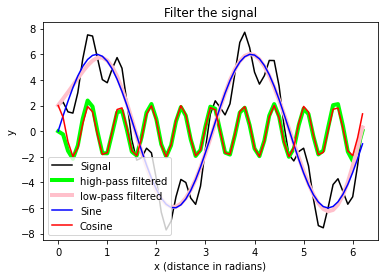

In [8]:
# Your solution 2.3 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.3:
# Apply the filter function:
A_clean1=my_filter(sampling_freq = x_values.shape[0], 
               cutoff_freq = 5, filter_order = 10,
               input_signal = A_signal, kind = "high")

A_clean2=my_filter(sampling_freq = x_values.shape[0], 
               cutoff_freq = 5, filter_order = 10,
               input_signal = A_signal, kind = "low")
    
# Plotting:
fig = plt.figure(1)
fig.clf()

# the main plot commands:
plt.plot(x_values, A_signal, label='Signal', c="k")
plt.plot(x_values, A_clean1, label='high-pass filtered',
         c = "lime", lw=4)
plt.plot(x_values, A_clean2, label='low-pass filtered',
         c = "pink", lw=4)
plt.plot(x_values, A_sin, label='Sine', c="blue")
plt.plot(x_values, A_cos, label='Cosine', c="red")
plt.legend(loc="best")

# axis labels and title:
plt.xlabel("x (distance in radians)")
plt.ylabel("y")
plt.title("Filter the signal")

# shows a legend:
plt.legend(loc="best")

plt.show()          # finalizes the plot
fig.savefig("my_plot3.pdf", dpi=120)
~~~
</details>

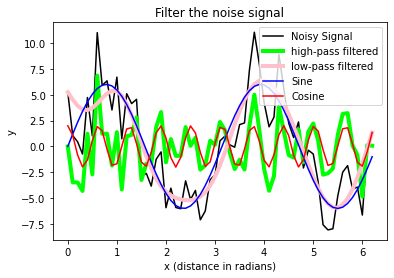

In [9]:
# Your solution 2.4 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.4:
A_clean1_noisy=my_filter(sampling_freq = x_values.shape[0], 
               cutoff_freq = 5, filter_order = 10,
               input_signal = A_signal_noisy, 
               kind = "high")

A_clean2_noisy=my_filter(sampling_freq = x_values.shape[0], 
               cutoff_freq = 5, filter_order = 10,
               input_signal = A_signal_noisy, 
               kind = "low")

# Plotting:
fig = plt.figure(1)
fig.clf()

# the main plot commands:
plt.plot(x_values, A_signal_noisy, 
         label='Noisy Signal', c="k")
plt.plot(x_values, A_clean1_noisy, label='high-pass filtered',
         c = "lime", lw=4)
plt.plot(x_values, A_clean2_noisy, label='low-pass filtered',
         c = "pink", lw=4)
plt.plot(x_values, A_sin, label='Sine', c="blue")
plt.plot(x_values, A_cos, label='Cosine', c="red")
plt.legend(loc="best")

# axis labels and title:
plt.xlabel("x (distance in radians)")
plt.ylabel("y")
plt.title("Filter the noise signal")

# shows a legend:
plt.legend(loc="best")

plt.show()          # finalizes the plot
fig.savefig("my_plot4.pdf", dpi=120)
~~~
</details>

<div class="alert alert-block alert-info">
<b>Advice:</b> Matplotlib commands can grow big very quickly. It's therefore often usefull to plug these commands into a function definition in order to keep your script readable and especially when you need to repeat your plot command(s) several times within your script.
</div>

## Exercise 3: Reading real world data
1. Download the data folder "Data/Pandas_3" (if not already done).
2. Write a script, the reads the file "mouse_1_odorA_3_results.xlsx" into a Pandas DataFrame. 
3. Iterate over the keys of the DataFrame (here called `df`) via
   ```python 
        for key in df.keys():
           plt.plot(time, df[key])
    ```
    and plot each column of the read Excel file data into one figure. Set an appropriate titel and x- and y-labels.
    Use the sample frequency `sampling_rate = 30.1` (unit: [1/s]) to construct the corresponding `time` array:
    ```python 
        time = np.arange(df.shape[0]) / sampling_rate
    ```
4. Visit the documentation website https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html and read how to apply a 1D median filter to a given data array. Apply this filter to each column of the data and plot the filtered results into a new figure.

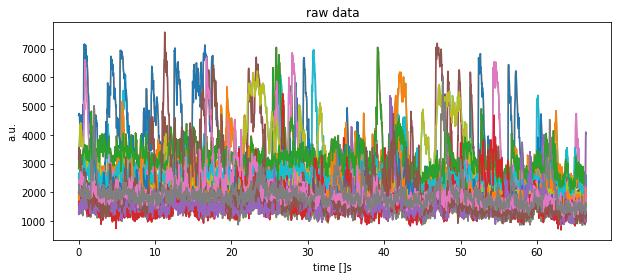

<Figure size 432x288 with 0 Axes>

In [21]:
# Your solution 3.2-3.3 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 3.2-3.3:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# %% DEFINE PATHS
"""Define file paths:"""
file_path = "Data/Pandas_2/"
file_name = "ROI_table.xlsx"
file_1 = os.path.join(file_path, file_name)

# %% DATA READING
""" Read the Excel files with Pandas into a Pandas Dataframe:"""
#df = pd.read_excel(file_1, engine='openpyxl')
sheet_to_read = "Tabelle1"
df = pd.read_excel(file_1, index_col=0, sheet_name=sheet_to_read)
sampling_rate = 30.1
time = np.arange(df.shape[0])/sampling_rate

# %% SOME PLOTS
fig=plt.figure(1,figsize=(10,4))
plt.clf()
for key in df.keys():
    plt.plot(time, df[key])
plt.title("raw data")
plt.xlabel("time []s")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "raw.pdf")
~~~
<details>

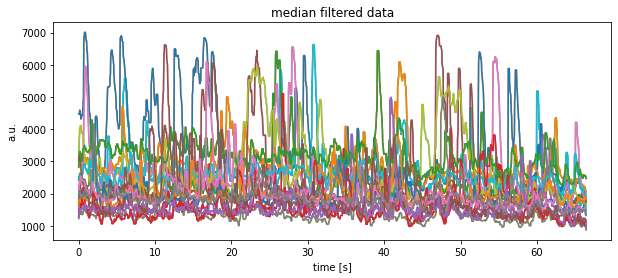

<Figure size 432x288 with 0 Axes>

In [7]:
# Your solution 3.4 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 3.4:
fig = plt.figure(2, figsize=(10, 4))
plt.clf()
for key in df.keys():
    plt.plot(time, signal.medfilt(df[key], kernel_size=9))
plt.title("median filtered data")
plt.xlabel("time [s]")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "median filtered.pdf")
~~~
<details>

In [8]:
df.shape

(2000, 38)

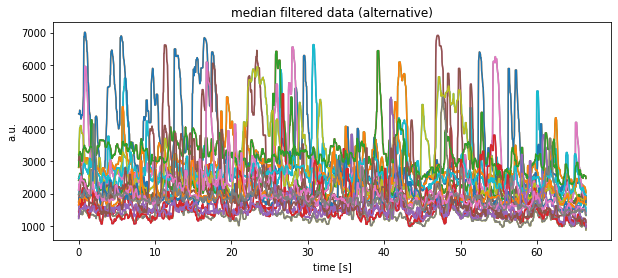

<Figure size 432x288 with 0 Axes>

In [9]:
# Alternative solution:


<details>
<summary><strong>Toggle alternative solution</strong></summary>

~~~python
# Pre-calculate (and save) median filtered data:

df_medianfiltered = np.zeros(df.shape) #This is not a DataFrame
                                       # any more, but a NUMPY
                                       # arrays

for column, key in enumerate(df.keys()):
    #print(f"column: {column}, key: {key}")
    df_medianfiltered[:, column] = \
           signal.medfilt(df[key], kernel_size=9)

fig = plt.figure(2, figsize=(10, 4))
plt.clf()
for column, key in enumerate(df.keys()):
    #df_medianfiltered[:, column] = \
    #       signal.medfilt(df[key], kernel_size=9)
    plt.plot(time, df_medianfiltered[:, column])
plt.title("median filtered data (alternative)")
plt.xlabel("time [s]")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "median filtered (alt).pdf")
~~~
<details>

### Example for exporting a _Pandas_ DataFrame into an _Excel_ file:

In [11]:
# Example for exporting our processed data into a new Excel file:
df_medianfiltered_out_df = pd.DataFrame(data=df_medianfiltered)
df_medianfiltered_out_df.to_excel("data_medianfiltered.xlsx")
"""Note, for initial call of '.to_excel' you need to install
   the package/module 'xlwt' """
df_medianfiltered_out_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1979.681,4476.209,2814.321,2416.224,1648.606,1449.719,1744.611,2119.442,1305.099,3221.120,...,3221.120,2468.984,1750.352,1649.530,2833.220,1282.657,1231.136,3042.830,2108.877,1966.602
1,2007.620,4476.209,2838.231,2425.859,1648.606,1606.934,1886.981,2251.333,1305.119,3336.423,...,3336.423,2477.631,1854.227,1785.687,3217.644,1435.793,1374.950,3142.866,2266.636,1966.602
2,2079.598,4476.209,2866.485,2520.453,1648.606,1606.934,1938.510,2251.333,1340.275,3628.556,...,3628.556,2508.199,1875.356,1785.687,3231.953,1457.536,1374.950,3142.866,2266.829,2029.088
3,2079.598,4476.209,2946.522,2522.406,1737.614,1618.653,2003.899,2321.433,1357.278,3760.244,...,3760.244,2516.503,1875.356,1807.257,3269.945,1500.843,1425.907,3142.866,2283.250,2029.088
4,2079.598,4589.748,2948.629,2625.568,1737.614,1618.653,2086.211,2424.808,1419.689,4031.759,...,4031.759,2575.812,1875.356,1852.093,3296.585,1500.843,1500.500,3142.866,2334.456,2029.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1659.978,1988.962,2204.836,1856.755,1084.831,1065.796,1785.423,1737.096,982.970,1787.830,...,1787.830,2002.620,1782.898,1908.837,2551.720,1140.593,1198.836,1228.652,1450.763,1504.574
1996,1623.542,1988.962,2187.248,1768.047,1008.979,1058.442,1749.308,1737.096,982.970,1787.830,...,1787.830,2002.620,1760.417,1908.837,2551.720,1022.057,1198.836,1207.696,1450.763,1504.574
1997,1585.314,1981.024,2127.415,1768.047,993.758,1018.179,1749.308,1737.096,970.974,1697.901,...,1697.901,1934.899,1760.417,1908.837,2551.720,1018.071,1198.836,1193.161,1421.070,1357.963
1998,1581.983,1874.429,2110.344,1757.333,993.106,1018.179,1660.389,1737.096,957.219,1690.157,...,1690.157,1934.899,1760.417,1908.837,2546.767,1010.943,1084.129,1185.286,1421.070,1323.653


## Grand average

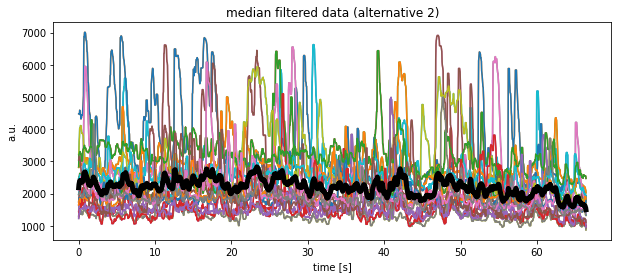

<Figure size 432x288 with 0 Axes>

In [12]:
# for the sake of curiosity, let's plot the Grand Average:
fig = plt.figure(2, figsize=(10, 4))
plt.clf()
for column, key in enumerate(df.keys()):
    plt.plot(time, df_medianfiltered[:, column])
plt.plot(time, df_medianfiltered.mean(axis=1), 'k', lw=5)
plt.title("median filtered data (alternative 2)")
plt.xlabel("time [s]")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "median filtered (alt 2).pdf")

Another alternative solution would look like as follows, but at the moment I do not understand, why the medians look so different compared to the previous calculations?!

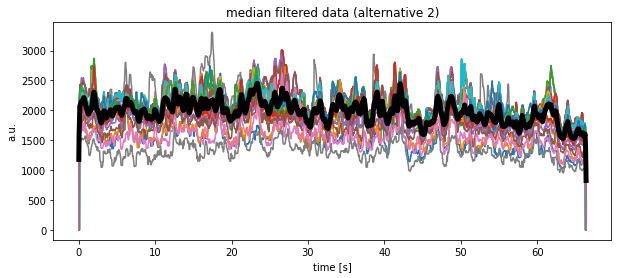

<Figure size 432x288 with 0 Axes>

In [13]:
# Another alternative solution to 3.4:


<details>
<summary><strong>Toggle another alternative solution</strong></summary>

~~~python
# Solution 3.4 (Alternative 2):
# Pre-calculate (and save) median filtered data:

df_medianfiltered_3 = signal.medfilt(df, kernel_size=9)
#This is not a DataFrame any more, but a NUMPY array

fig = plt.figure(2, figsize=(10, 4))
plt.clf()
for column in range(df_medianfiltered_3.shape[1]):
    plt.plot(time, df_medianfiltered_3[:, column])
plt.plot(time, df_medianfiltered_3.mean(axis=1), 'k', lw=5)
plt.title("median filtered data (alternative 2)")
plt.xlabel("time [s]")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "median filtered (alt 2).pdf")
~~~
<details>

## Exercise 4: Apply your filter function to real world data (Exercise 3 continued)

5. Apply the `my_filter` function, that we have written above, to the data read in Exercise 3 and plot, again, the results into a new figure.
6. Save each of your three figures (those from Exercise 3 including) into a separate PDF file.

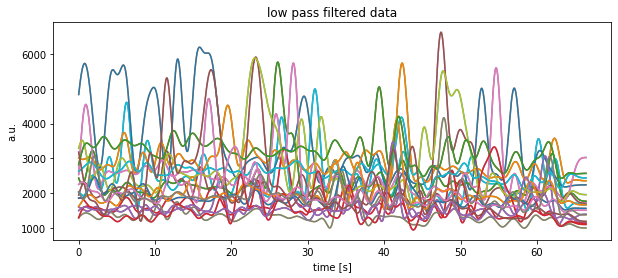

<Figure size 432x288 with 0 Axes>

In [14]:
# Your solution 4 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4:

# recap our previous designed filter-function:
def my_filter(sampling_freq, cutoff_freq,
              filter_order, input_signal, kind):
    """ Function for optionally high- or low-pass
        filter a given input signal

        sampling_freq: Sampling frequency
        cutoff_freq:   Cut-off frequency of the filter
        filter_order:  Order of the filter
        input_signal:  Signal to filter
        kind:          "high" or "low"
    """
    fc = cutoff_freq
    fs = sampling_freq

    w = fc / (fs / 2)  # Normalize the frequency
    b, a = signal.butter(filter_order, w, kind)

    # filtering the signal
    filtered = signal.filtfilt(b, a, input_signal)

    return filtered

fig = plt.figure(2, figsize=(10, 4))
plt.clf()
for key in df.keys():
    current_signal = my_filter(sampling_freq = sampling_rate, 
                               cutoff_freq = 0.5, 
                               filter_order = 10,
                               input_signal = df[key], 
                               kind = "low")
    plt.plot(time, current_signal)
plt.title("low pass filtered data")
plt.xlabel("time [s]")
plt.ylabel("a.u.")
plt.show()
plt.savefig(file_1 + "low-pass filtered.pdf")
~~~
<details>

## Exercise 5: Batch file processing

Now, and instead of reading each Excel manually, use the following command to scan for all Excel files in the downloaded folder:

~~~python
file_name = [f for f in os.listdir(file_path) if f.endswith('.xlsx')]
~~~

Copy your solutions from above into a new script. Change the new script in that way, that it iterates over all scanned file names in `file_name`, starting from the Pandas reading part. Play a bit around, to see, what is contained in `file_name`. 

**Hint**: The automatized reading of the filenames now requires an iteration of your pipeline within a [_for_-loop](https://www.fabriziomusacchio.com/teaching/python_course/05_for_loops).

['ROI_table.xlsx', 'ROI_table_1.xlsx', 'ROI_table_5.xlsx', 'ROI_table_4.xlsx', 'ROI_table_3.xlsx', 'ROI_table_2.xlsx']


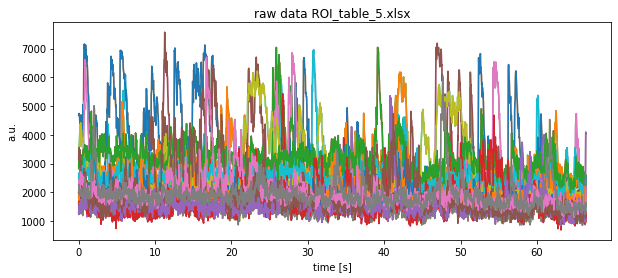

<Figure size 432x288 with 0 Axes>

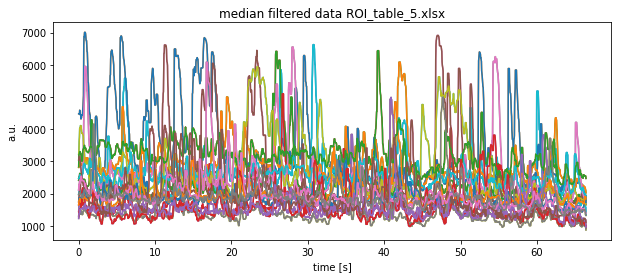

<Figure size 432x288 with 0 Axes>

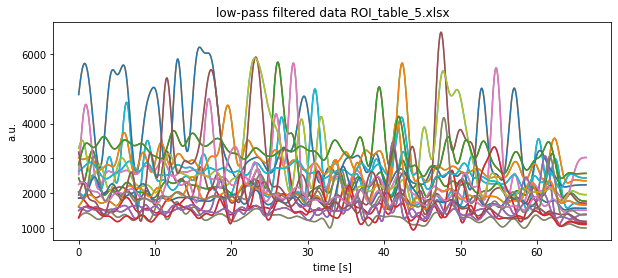

<Figure size 432x288 with 0 Axes>

In [20]:
# Your solution 5 here:


Here and for the moment, the result of only one Excel file is shown.

<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 5 (full script):
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# %% DEFINE PATHS
"""Define file paths:"""
file_path = "Data/Pandas_2/"
file_name = [f for f in os.listdir(file_path) if f.endswith('.xlsx')]
sheet_to_read = "Tabelle1"

print(file_name)

# %% SOME FUNCTIONS
def my_filter(sampling_freq, cutoff_freq,
              filter_order, input_signal, kind):
    """ Function for optionally high- or low-pass
        filter a given input signal

        sampling_freq: Sampling frequency
        cutoff_freq:   Cut-off frequency of the filter
        filter_order:  Order of the filter
        input_signal:  Signal to filter
        kind:          "high" or "low"
    """
    fc = cutoff_freq
    fs = sampling_freq

    w = fc / (fs / 2)  # Normalize the frequency
    b, a = signal.butter(filter_order, w, kind)

    # filtering the signal
    filtered = signal.filtfilt(b, a, input_signal)

    return filtered

# %% ITERATIVELY DATA READING
""" Read the Excel files with Pandas into a Pandas Dataframe:"""
sampling_rate = 30.1 # in Hertz [1/s]

#for file in file_name:  # uncomment this line for a full run
for file in [file_name[2]]:

    # read the current Excle file:
    current_file = os.path.join(file_path, file)
    df = pd.read_excel(current_file, index_col=0, 
                       sheet_name=sheet_to_read)
    #df = pd.read_excel(current_file, engine='openpyxl')

    # calculate the current time-array:
    time = np.arange(df.shape[0]) / sampling_rate

    # plots:
    fig = plt.figure(1, figsize=(10, 4))
    plt.clf()
    for key in df.keys():
        plt.plot(time, df[key])
    plt.title(f"raw data {file}")
    plt.xlabel("time [s]")
    plt.ylabel("a.u.")
    plt.show()
    plt.savefig(file_path + file + "raw.pdf")

    fig = plt.figure(2, figsize=(10, 4))
    plt.clf()
    for key in df.keys():
        plt.plot(time, signal.medfilt(df[key], kernel_size=9))
    plt.title(f"median filtered data {file}")
    plt.xlabel("time [s]")
    plt.ylabel("a.u.")
    plt.show()
    plt.savefig(file_path + file + "median filtered.pdf")

    fig = plt.figure(3, figsize=(10, 4))
    plt.clf()
    for key in df.keys():
        current_signal = my_filter(sampling_freq=sampling_rate, 
                                   cutoff_freq=0.5, filter_order=10,
                                   input_signal=df[key], kind="low")
        plt.plot(time, current_signal)
    plt.title(f"low-pass filtered data {file}")
    plt.xlabel("time [s]")
    plt.ylabel("a.u.")
    plt.show()
    plt.savefig(file_path+file+"low pass filtered.pdf")
~~~
</details>